### Yahoo Finance

/Users/chaitanyakalantri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[*********************100%%**********************]  1 of 1 completed


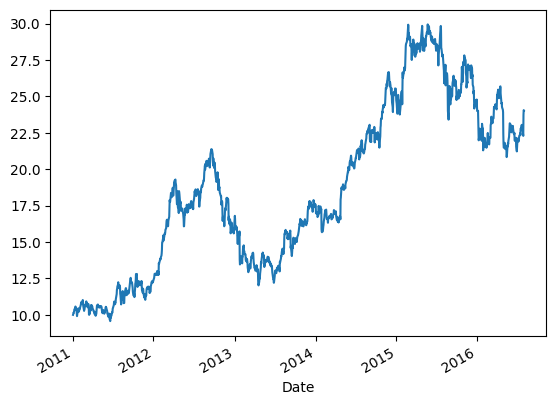

In [1]:
# Import the yfinance. If you get module not found error the run !pip install yfinance from your Jupyter notebook
import yfinance as yf
import smtplib
# Import the plotting library
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Get the data for the stock AAPL
data = yf.download('AAPL','2011-01-01','2016-08-01')

%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

### Data for multiple stocks

In [2]:
# Define the ticker list
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Fetch the data
data = yf.download(tickers_list,'2015-1-1')['Adj Close']

# Print first 5 rows of the data
print(data.head())

[*********************100%%**********************]  6 of 6 completed
                 AAPL        AXP          BA         IBM         MU        WMT
Date                                                                          
2015-01-02  24.498680  81.618011  113.657219  105.479942  34.264706  71.431732
2015-01-05  23.808516  79.459572  112.870056  103.820213  33.308250  71.223824
2015-01-06  23.810759  77.766129  111.540634  101.581207  32.410961  71.772659
2015-01-07  24.144632  79.464539  113.272400  100.917358  31.651716  73.676964
2015-01-08  25.072327  80.590965  115.275269  103.110764  33.199795  75.231972


### Send Email

In [3]:
# https://support.google.com/accounts/answer/185833?visit_id=21694490596413-502103075102088921&p=InvalidSecondFactor&rd=1
gmail_user = 'hashmitamundhda1997@gmail.com'
gmail_password = 'xxxx xxxx xxxx xxxx' # 16 digit app password

sent_from = gmail_user
to = ['hashmitamundhda1997@gmail.com']
subject = 'Stock Details as of 2015-1-1'
body = data.head(1)


email_text = """\
From: %s
To: %s
Subject: %s

%s
""" % (sent_from, ", ".join(to), subject, body)

try:
    smtp_server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    smtp_server.ehlo()
    smtp_server.login(gmail_user, gmail_password)
    smtp_server.sendmail(sent_from, to, email_text)
    smtp_server.close()
    print ("Email sent successfully!")
except Exception as ex:
    print ("Something went wrong….",ex)

Email sent successfully!


### S&P 500

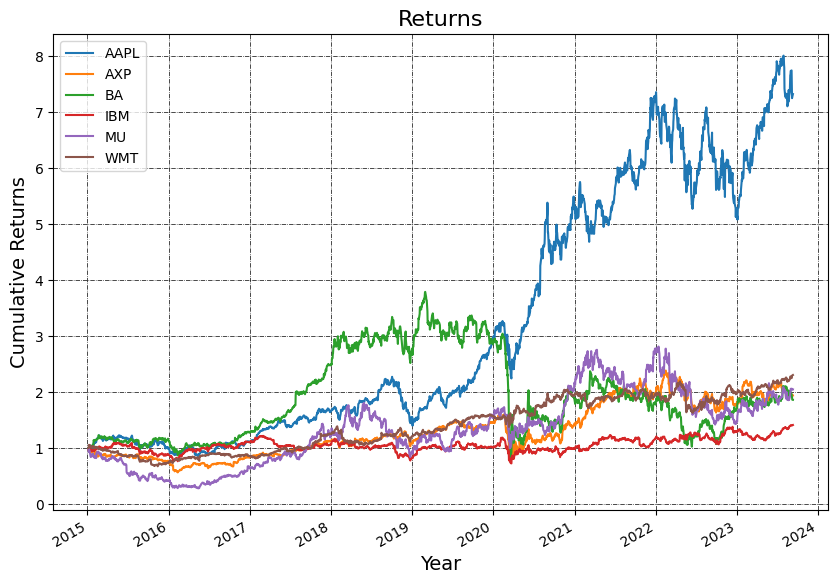

In [4]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()